In [1]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt  
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score,roc_curve # ROC a diferencia del accuracy te da un valor justo de precision para datos desbalanceados

In [2]:
data_type = 'feat'
df = pd.read_csv((f'nasa_bearing_dataset/df_{data_type}.csv'), index_col=False)

In [3]:
# df.drop(columns='Unnamed: 0',inplace=True)

In [4]:
df.shape

(6706, 10)

In [5]:
df.head()

,max,min,mean,std,rms,skewness,kurtosis,crest_factor,form_factor,target
0,0.486,-0.659,-0.114358,0.111572,0.159767,0.047967,0.557259,3.041937,-1.397075,normal
1,0.662,-0.845,-0.113785,0.112849,0.160254,0.072265,0.935819,4.130944,-1.408397,normal
2,0.439,-0.691,-0.114440,0.109290,0.158241,0.016991,0.592992,2.774243,-1.382745,normal
3,0.459,-0.762,-0.115351,0.112622,0.161211,-0.000778,0.548151,2.847195,-1.397570,normal
4,0.525,-0.833,-0.114336,0.109718,0.158462,0.004558,0.693244,3.313105,-1.385930,normal


In [6]:
df['target'].unique()

array(['normal', 'inner race', 'roller element', 'outer race'],
      dtype=object)

In [7]:
df.groupby('target').agg({'target':['count']})

,target
,count
target,
inner race,70
normal,5077
outer race,705
roller element,854


In [8]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [9]:
mapping = {index: label for index, label in enumerate(encoder.classes_)}

print("\nMapping of encoded values to original labels:")
print(mapping)


Mapping of encoded values to original labels:
{0: 'inner race', 1: 'normal', 2: 'outer race', 3: 'roller element'}


In [10]:
df.head()

,max,min,mean,std,rms,skewness,kurtosis,crest_factor,form_factor,target
0,0.486,-0.659,-0.114358,0.111572,0.159767,0.047967,0.557259,3.041937,-1.397075,1
1,0.662,-0.845,-0.113785,0.112849,0.160254,0.072265,0.935819,4.130944,-1.408397,1
2,0.439,-0.691,-0.114440,0.109290,0.158241,0.016991,0.592992,2.774243,-1.382745,1
3,0.459,-0.762,-0.115351,0.112622,0.161211,-0.000778,0.548151,2.847195,-1.397570,1
4,0.525,-0.833,-0.114336,0.109718,0.158462,0.004558,0.693244,3.313105,-1.385930,1


In [11]:
df.isna().sum().sum()

0

In [12]:
df.shape

(6706, 10)

In [13]:
df.groupby('target').agg({'target':['count']})

,target
,count
target,
0,70
1,5077
2,705
3,854


In [14]:
# Standardize the features
X = df.drop("target", axis=1) 
y = df["target"]
# Standardize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# X = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5364, 9)
(1342, 9)
(5364,)
(1342,)


In [16]:
pd.DataFrame(y_train).groupby('target').agg({'target':['count']})

,target
,count
target,
0,59
1,4047
2,578
3,680


In [17]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

def apply_classifier(clf, xTrain, xTest, yTrain, yTest):
    clf.fit(xTrain, yTrain)  # Entrenamiento del modelo
    predictions = clf.predict(xTest)  # Predicciones en el conjunto de prueba
    conf_mtx = confusion_matrix(yTest, predictions)  # Matriz de confusión

    # Definición del área de visualización (2 gráficas)
    f, axes = plt.subplots(ncols=2, figsize=(15, 5)) 

    # Formato de la matriz de confusión
    sns.heatmap(conf_mtx, annot=True, cbar=False, fmt="g", ax=axes[0])
    axes[0].set_xlabel('Predicted labels')  # Título del eje x
    axes[0].set_ylabel('True labels')  # Título del eje y
    axes[0].set_title('Confusion Matrix Test')  # Título de la matriz de confusión
    axes[0].xaxis.set_ticklabels(['inner race', 'normal', 'outer race', 'roller element'])  # Etiquetas del eje x
    axes[0].yaxis.set_ticklabels(['inner race', 'normal', 'outer race', 'roller element'])  # Etiquetas del eje y

    # Mostrar el reporte de clasificación
    print(classification_report(yTest, predictions)) 

    # Cálculo del AUC para múltiples clases
    yTest_binarized = label_binarize(yTest, classes=[0, 1, 2, 3])
    predictions_binarized = label_binarize(predictions, classes=[0, 1, 2, 3])
    roc_auc = roc_auc_score(yTest_binarized, predictions_binarized, average="macro", multi_class="ovo")
    print("AUC ROC : ", roc_auc)  # Mostrar el resultado del AUC

    # Generación de la curva ROC para múltiples clases
    fpr = dict()
    tpr = dict()
    for i in range(4):
        fpr[i], tpr[i], _ = roc_curve(yTest_binarized[:, i], predictions_binarized[:, i])
        axes[1].plot(fpr[i], tpr[i], label=f'class {i} (auc = {roc_auc:.2f})')

    # Línea diagonal de referencia
    axes[1].plot([0, 1], [0, 1], 'k--')
    axes[1].set_xlabel('False Positive Rate')  # Título del eje x
    axes[1].set_ylabel('True Positive Rate')  # Título del eje y
    axes[1].set_title('ROC')  # Título del gráfico
    plt.legend(loc='lower right')  # Mostrar la leyenda
    plt.show()  # Mostrar las gráficas

# Ejemplo de uso (asegúrate de tener los datos y un clasificador):
# from sklearn.ensemble import RandomForestClassifier
# apply_classifier(RandomForestClassifier(), xTrain, xTest, yTrain, yTest)


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.99      0.99      0.99      1030
           2       1.00      0.98      0.99       127
           3       0.92      0.95      0.94       174

    accuracy                           0.98      1342
   macro avg       0.96      0.98      0.97      1342
weighted avg       0.98      0.98      0.98      1342

AUC ROC :  0.9853873692478821


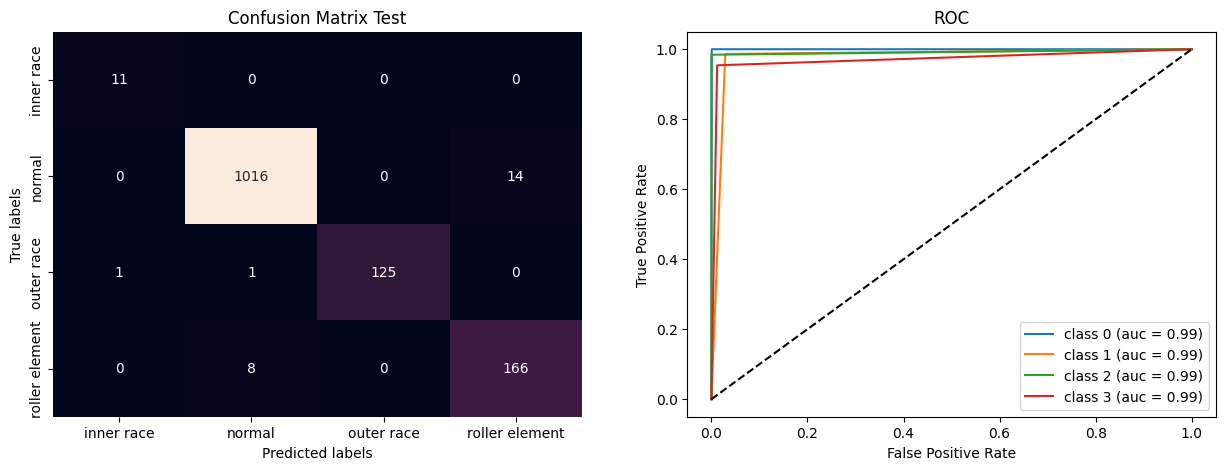

In [18]:
decision_tree = DecisionTreeClassifier() # Definir nuestro modelo
apply_classifier(decision_tree,X_train, X_test, y_train, y_test) # Aplicar la funcion que hemos construido

C:\Users\johan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.84      0.94      0.89      1030
           2       0.93      0.60      0.73       127
           3       0.38      0.21      0.27       174

    accuracy                           0.81      1342
   macro avg       0.74      0.64      0.67      1342
weighted avg       0.79      0.81      0.79      1342

AUC ROC :  0.7385467384797968


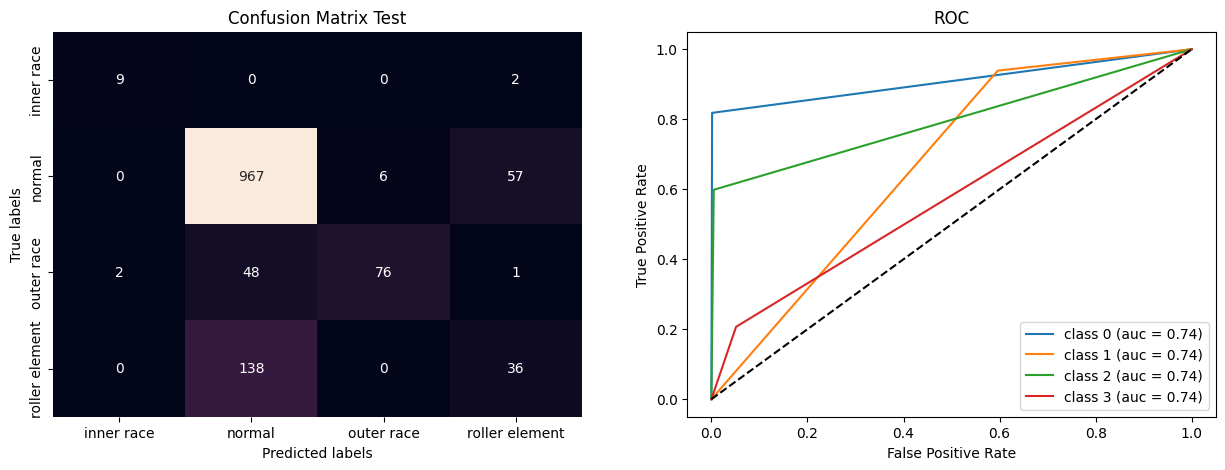

In [19]:
logistic_reg = LogisticRegression()
apply_classifier(logistic_reg,X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.99      0.99      0.99      1030
           2       1.00      0.99      1.00       127
           3       0.95      0.96      0.96       174

    accuracy                           0.99      1342
   macro avg       0.97      0.99      0.98      1342
weighted avg       0.99      0.99      0.99      1342

AUC ROC :  0.9892615726997428


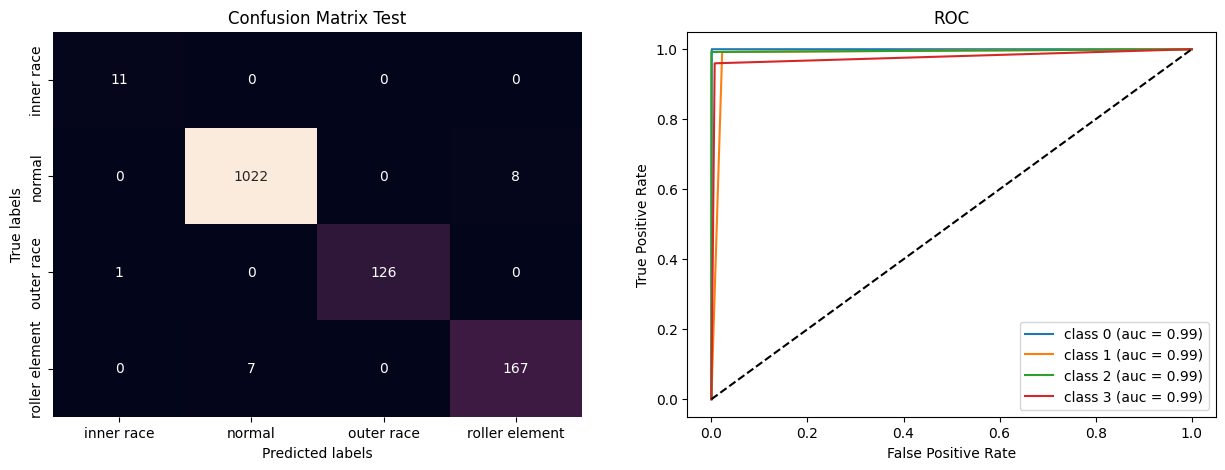

In [20]:
random_forest = RandomForestClassifier(random_state = 42)
apply_classifier(random_forest,X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.99      0.99      1030
           2       1.00      0.99      1.00       127
           3       0.95      0.99      0.97       174

    accuracy                           0.99      1342
   macro avg       0.96      0.99      0.98      1342
weighted avg       0.99      0.99      0.99      1342

AUC ROC :  0.9943999723084441


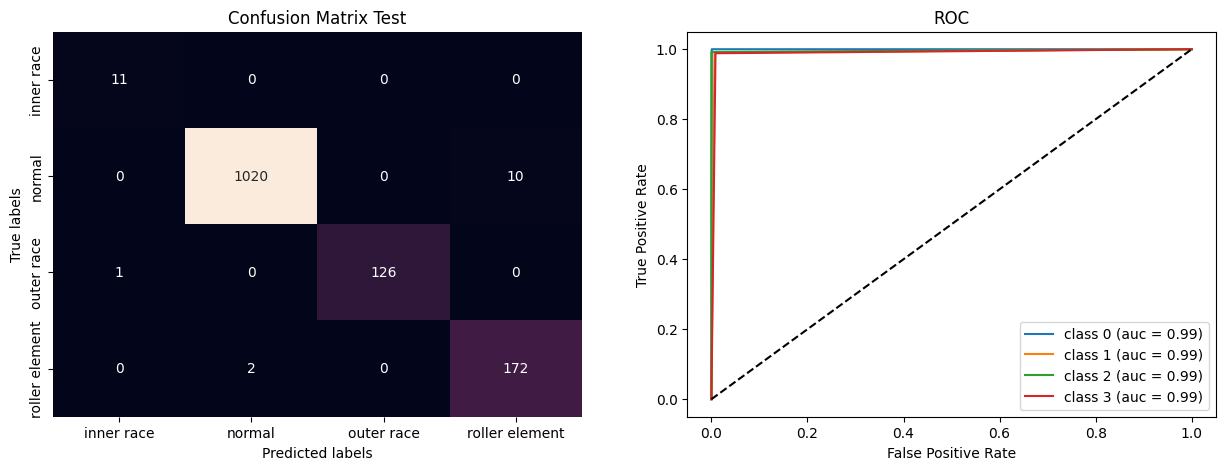

In [21]:
xg_boost = XGBClassifier()
apply_classifier(xg_boost,X_train, X_test, y_train, y_test)

In [22]:
from sklearn.utils import resample

In [23]:
df_class_0 = df[df['target'] == 0]
df_class_1 = df[df['target'] == 1]
df_class_2 = df[df['target'] == 2]
df_class_3 = df[df['target'] == 3]

In [24]:
# Resample the minority classes to match the majority class
df_class_0_upsampled = resample(df_class_0, 
                                replace=True,    # sample with replacement
                                n_samples=len(df_class_1),  # to match majority class
                                random_state=123)  # reproducible results

df_class_2_upsampled = resample(df_class_2, 
                                replace=True, 
                                n_samples=len(df_class_1), 
                                random_state=123)

df_class_3_upsampled = resample(df_class_3, 
                                replace=True, 
                                n_samples=len(df_class_1), 
                                random_state=123)

In [25]:
df_balanced = pd.concat([df_class_0_upsampled, df_class_1, df_class_2_upsampled, df_class_3_upsampled])


In [26]:
# Standardize the features
X = df_balanced.drop("target", axis=1) 
y = df_balanced["target"]
# Standardize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# X = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
pd.DataFrame(y_train).groupby('target').agg({'target':['count']})

,target
,count
target,
0,4084
1,4021
2,4082
3,4059


In [28]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

def apply_classifier(clf, xTrain, xTest, yTrain, yTest):
    clf.fit(xTrain, yTrain)  # Entrenamiento del modelo
    predictions = clf.predict(xTest)  # Predicciones en el conjunto de prueba
    conf_mtx = confusion_matrix(yTest, predictions)  # Matriz de confusión

    # Definición del área de visualización (2 gráficas)
    f, axes = plt.subplots(ncols=2, figsize=(15, 5)) 

    # Formato de la matriz de confusión
    sns.heatmap(conf_mtx, annot=True, cbar=False, fmt="g", ax=axes[0])
    axes[0].set_xlabel('Predicted labels')  # Título del eje x
    axes[0].set_ylabel('True labels')  # Título del eje y
    axes[0].set_title('Confusion Matrix Test')  # Título de la matriz de confusión
    axes[0].xaxis.set_ticklabels(['inner race', 'normal', 'outer race', 'roller element'])  # Etiquetas del eje x
    axes[0].yaxis.set_ticklabels(['inner race', 'normal', 'outer race', 'roller element'])  # Etiquetas del eje y

    # Mostrar el reporte de clasificación
    print(classification_report(yTest, predictions)) 

    # Cálculo del AUC para múltiples clases
    yTest_binarized = label_binarize(yTest, classes=[0, 1, 2, 3])
    predictions_binarized = label_binarize(predictions, classes=[0, 1, 2, 3])
    roc_auc = roc_auc_score(yTest_binarized, predictions_binarized, average="macro", multi_class="ovo")
    print("AUC ROC : ", roc_auc)  # Mostrar el resultado del AUC

    # Generación de la curva ROC para múltiples clases
    fpr = dict()
    tpr = dict()
    for i in range(4):
        fpr[i], tpr[i], _ = roc_curve(yTest_binarized[:, i], predictions_binarized[:, i])
        axes[1].plot(fpr[i], tpr[i], label=f'class {i} (auc = {roc_auc:.2f})')

    # Línea diagonal de referencia
    axes[1].plot([0, 1], [0, 1], 'k--')
    axes[1].set_xlabel('False Positive Rate')  # Título del eje x
    axes[1].set_ylabel('True Positive Rate')  # Título del eje y
    axes[1].set_title('ROC')  # Título del gráfico
    plt.legend(loc='lower right')  # Mostrar la leyenda
    plt.show()  # Mostrar las gráficas

# Ejemplo de uso (asegúrate de tener los datos y un clasificador):
# from sklearn.ensemble import RandomForestClassifier
# apply_classifier(RandomForestClassifier(), xTrain, xTest, yTrain, yTest)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       993
           1       1.00      0.99      0.99      1056
           2       1.00      1.00      1.00       995
           3       0.99      1.00      0.99      1018

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062

AUC ROC :  0.9977533964868583


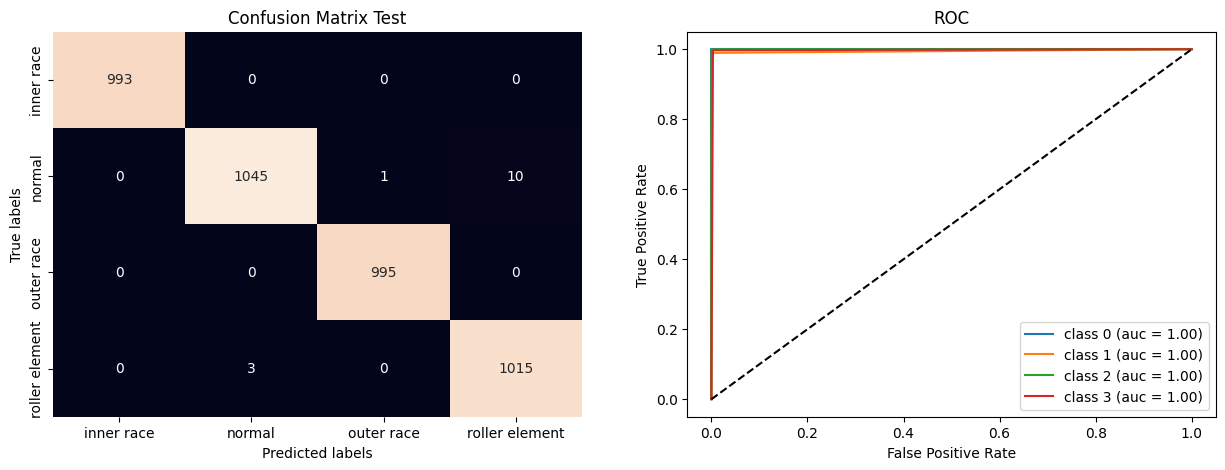

In [29]:
decision_tree = DecisionTreeClassifier() # Definir nuestro modelo
apply_classifier(decision_tree,X_train, X_test, y_train, y_test) # Aplicar la funcion que hemos construido

C:\Users\johan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       993
           1       0.81      0.74      0.77      1056
           2       0.93      0.89      0.91       995
           3       0.82      0.92      0.87      1018

    accuracy                           0.88      4062
   macro avg       0.89      0.89      0.89      4062
weighted avg       0.88      0.88      0.88      4062

AUC ROC :  0.9239888048236895


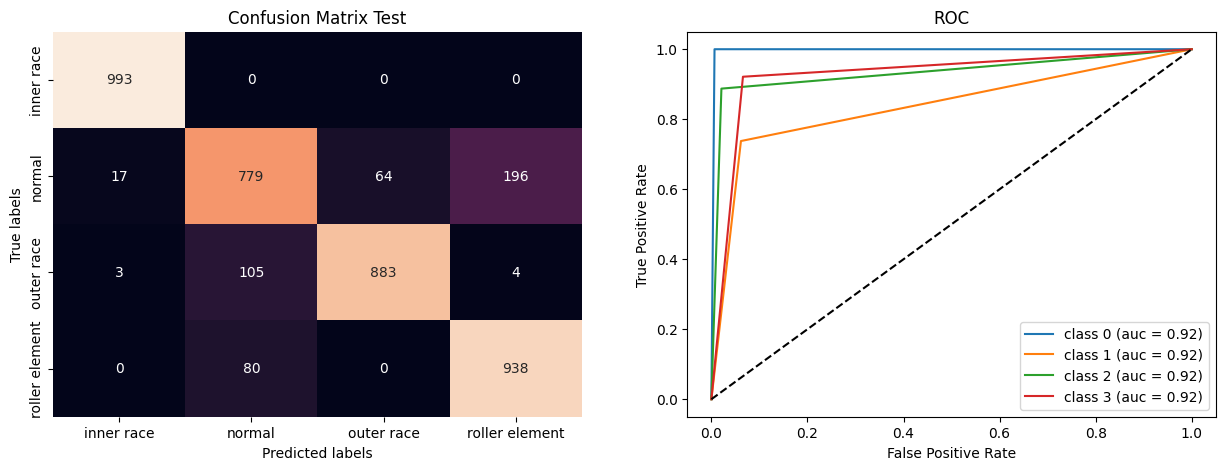

In [30]:
logistic_reg = LogisticRegression()
apply_classifier(logistic_reg,X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       993
           1       1.00      0.99      1.00      1056
           2       1.00      1.00      1.00       995
           3       0.99      1.00      1.00      1018

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062

AUC ROC :  0.9985653875396965


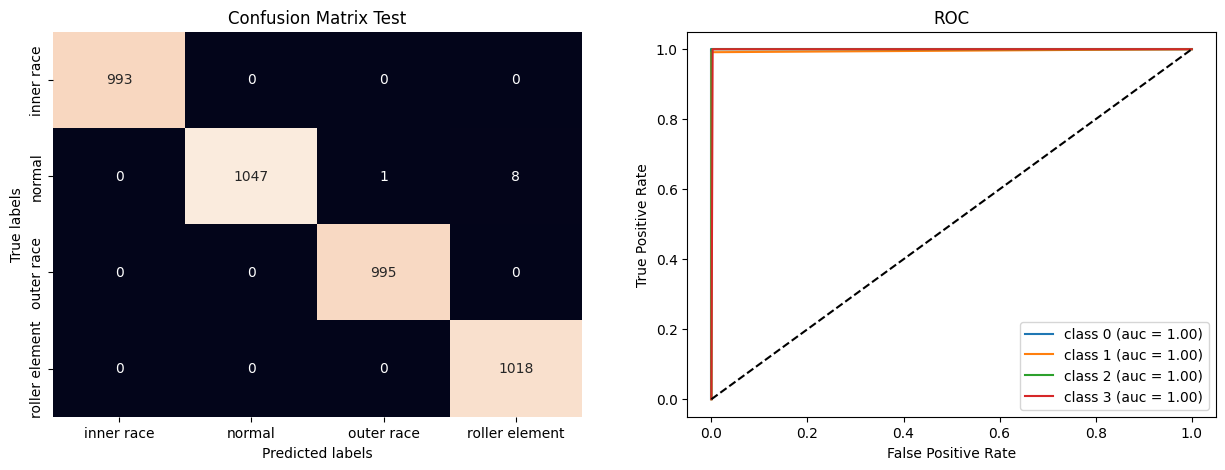

In [31]:
random_forest = RandomForestClassifier(random_state = 42)
apply_classifier(random_forest,X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       993
           1       1.00      0.99      1.00      1056
           2       1.00      1.00      1.00       995
           3       0.99      1.00      1.00      1018

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062

AUC ROC :  0.9985653875396965


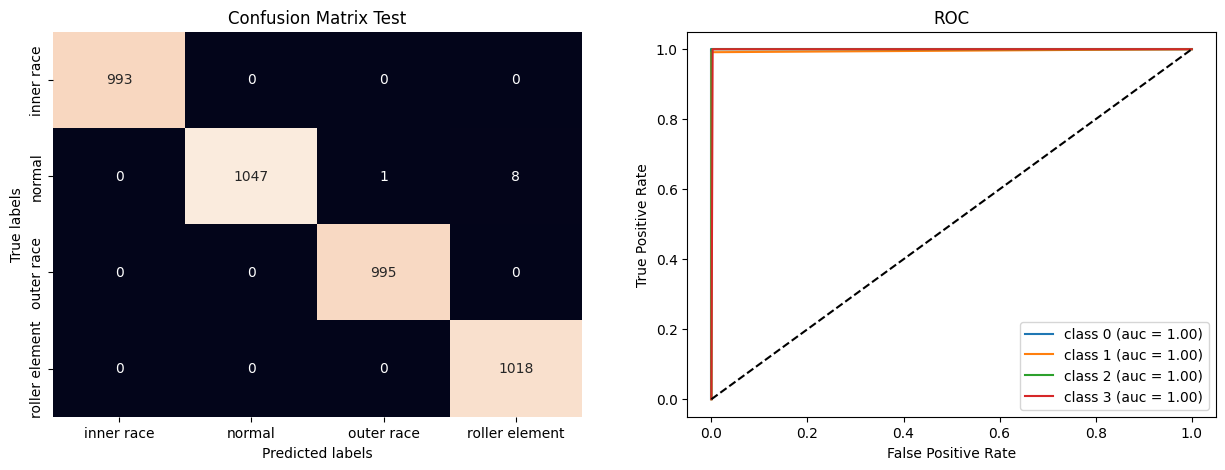

In [32]:
xg_boost = XGBClassifier()
apply_classifier(xg_boost,X_train, X_test, y_train, y_test)